# Binary Food Vision With Keras and TensorFlow

During this project I will create a **CNN** (Convolutional Neural Network) using **Keras Sequential API**. I will work with a dataset of food images (hamburgers and pizzas) which is a subset of the food101 dataset, which contains 101 food categories with 101'000 images. The original source paper and data is [here](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/). The data was extracted using functions from this [file]().

The project was made following instructions from ZTM course. The original notebook could be found here: [GitHub link](https://github.com/mrdbourke/tensorflow-deep-learning/tree/main)

# Setting the WorkSpace

In [1]:
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.13.0


In [2]:
#check available devices
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-09-26 15:11:23.660126


# Getting, Inspecting and Visualising the data

For this project I will use a subsets of the original food101 dataset - Hamburger and Pizza dataset.

In [5]:
folder_path = '/content/drive/MyDrive/Projects/food101/hamburger_and_pizza'

In [6]:
!ls /content/drive/MyDrive/Projects/food101/hamburger_and_pizza

test  train


In [7]:
!ls /content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train

hamburger  pizza


Walking through the directory and listing the number of files

In [8]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train'.
There are 0 directories and 750 images in '/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train/hamburger'.
There are 0 directories and 750 images in '/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train/pizza'.


Now I will create a function that visualizes three random images of a selected class

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_three_images(target_dir, target_class):
    """
    Randomly selects and displays 3 random images
    from `target_class` folder in `target_dir` folder.
    """
    target_path = target_dir + target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)

    plt.figure(figsize=(10, 3))
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

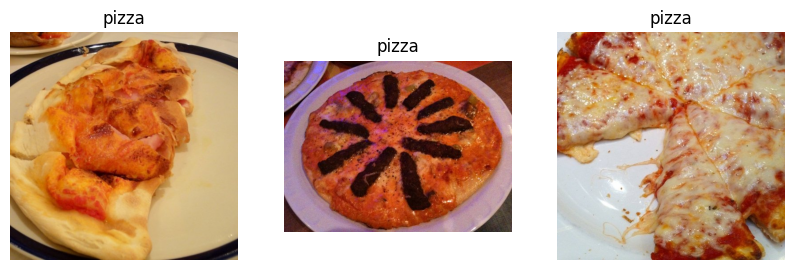

In [10]:
view_three_images(target_dir="/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train/",
                  target_class="pizza")

# Building the model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

Preprocessing of the data and creating Mini Batches

In [12]:
tf.random.set_seed(42)
BATCH_SIZE = 32
TARGET_SIZEE = (224, 224)

# preprocessing the data (including normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_path = "/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train/"
test_path = "/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/test/"

train_data = train_datagen.flow_from_directory(train_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=TARGET_SIZEE,
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=TARGET_SIZEE,
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Building, compiling and training the model

In [13]:
model_binary_1 = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=TARGET_SIZEE + (3, )),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_binary_1.compile(loss='binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

In [14]:
history_1 = model_binary_1.fit(train_data,
                               epochs=5,
                               steps_per_epoch=len(train_data),
                               validation_data=valid_data,
                               validation_steps=len(valid_data)*0.25) # to speed up the process

Epoch 1/5
47/47 [==============================] - 22s 224ms/step - loss: 0.6740 - accuracy: 0.5433 - val_loss: 0.6591 - val_accuracy: 0.6016
Epoch 2/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6020 - accuracy: 0.6820 - val_loss: 0.5671 - val_accuracy: 0.6875
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5260 - accuracy: 0.7433 - val_loss: 0.4882 - val_accuracy: 0.7812
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5026 - accuracy: 0.7600 - val_loss: 0.5354 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.4579 - accuracy: 0.7833 - val_loss: 0.5026 - val_accuracy: 0.7266


# Evaluating the model

In [15]:
model_binary_1.evaluate(valid_data)

16/16 [==============================] - 3s 177ms/step - loss: 0.4455 - accuracy: 0.7880


[0.44554808735847473, 0.7879999876022339]

In [16]:
model_binary_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

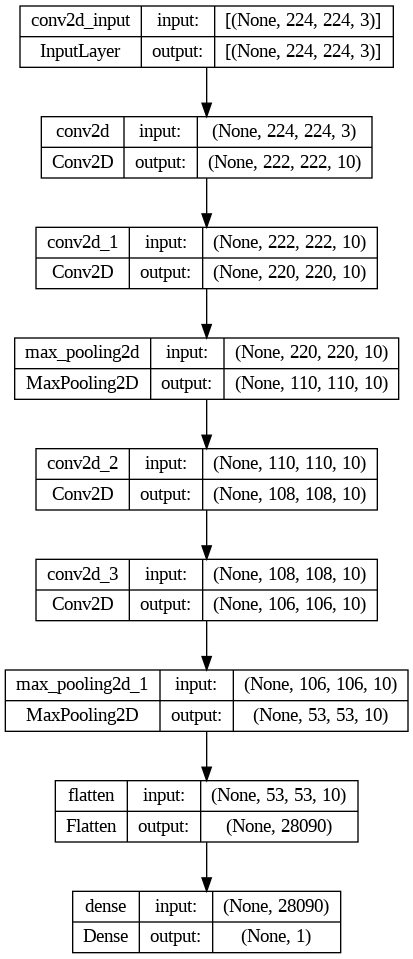

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model_binary_1, show_shapes=True, show_layer_names=True)

Plotting the training curves

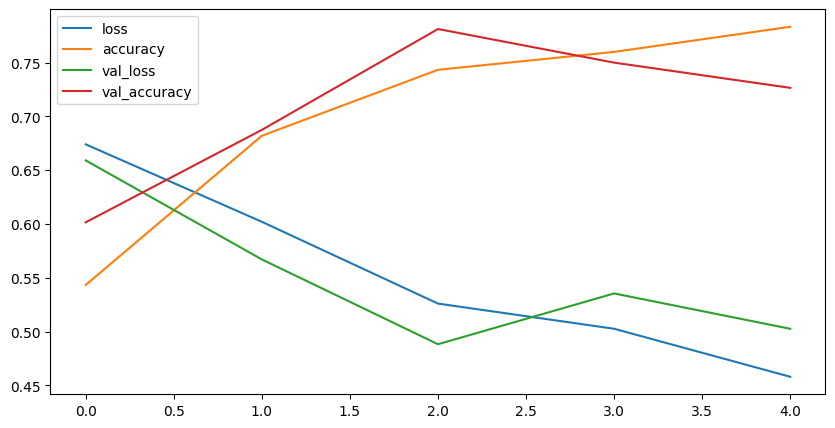

In [18]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 5));

# Fine-tuning the model

Looks like the model is overfitting.To solve this problem:
1. First I will try to add the data augmenting layer to the model.
2. Second I will try to add dropout layers to the model

In [19]:
from tensorflow.keras import layers
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'data_augmentation')

Now I will rebuild the model. I will also use GlobalMaxPool2D instead of Flatten layer, because Dense layer needs a fixed shape for the last dimension, which could not be provided using flattened batches if I use augmented data (RandomWidth and RandomHeight lead to `None` dimensions).

In [20]:
from tensorflow.keras.layers import Dropout, GlobalMaxPool2D

model_binary_2 = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=TARGET_SIZEE + (3, )),
    data_augmentation,
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    GlobalMaxPool2D(),
    Dense(1, activation='sigmoid')
])

model_binary_2.compile(loss='binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

In [21]:
history_2 = model_binary_2.fit(train_data,
                               epochs=5,
                               steps_per_epoch=len(train_data),
                               validation_data=valid_data,
                               validation_steps=len(valid_data)*0.25) # to speed up the process


Epoch 1/5
47/47 [==============================] - 49s 959ms/step - loss: 0.6908 - accuracy: 0.5233 - val_loss: 0.6828 - val_accuracy: 0.6797
Epoch 2/5
47/47 [==============================] - 42s 879ms/step - loss: 0.6814 - accuracy: 0.5827 - val_loss: 0.6623 - val_accuracy: 0.6875
Epoch 3/5
47/47 [==============================] - 41s 874ms/step - loss: 0.6650 - accuracy: 0.6213 - val_loss: 0.6504 - val_accuracy: 0.6641
Epoch 4/5
47/47 [==============================] - 42s 883ms/step - loss: 0.6385 - accuracy: 0.6307 - val_loss: 0.5997 - val_accuracy: 0.6953
Epoch 5/5
47/47 [==============================] - 40s 847ms/step - loss: 0.6224 - accuracy: 0.6667 - val_loss: 0.6116 - val_accuracy: 0.6953


In [22]:
model_binary_2.evaluate(valid_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.5797 - accuracy: 0.7520


[0.5796920657157898, 0.7519999742507935]

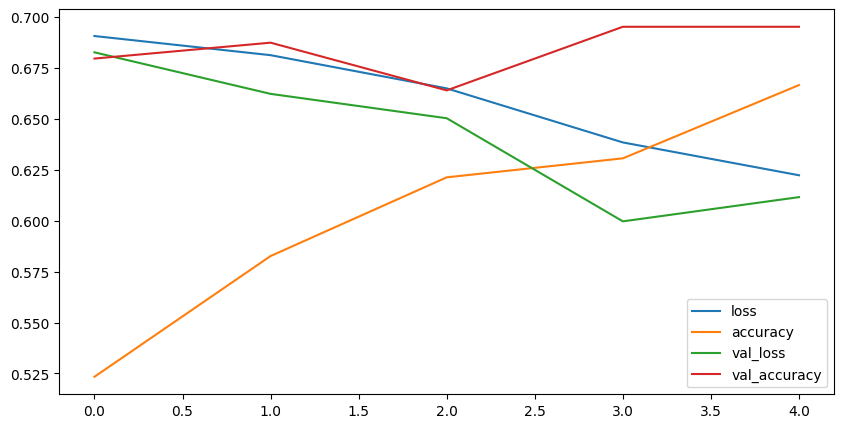

In [23]:
pd.DataFrame(history_2.history).plot(figsize=(10, 5));

Looks like model works worse without Flatten layer

Now I will add only Dropout layers, keeping the Flatten layer

In [24]:
model_binary_3 = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=TARGET_SIZEE + (3, )),
    Conv2D(10, 3, activation = 'relu'),
    Dropout(0.1),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Dropout(0.1),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_binary_3.compile(loss='binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

history_3 = model_binary_3.fit(train_data,
                               epochs=5,
                               steps_per_epoch=len(train_data),
                               validation_data=valid_data,
                               validation_steps=len(valid_data)*0.25) # to speed up the process


Epoch 1/5
47/47 [==============================] - 11s 173ms/step - loss: 0.7099 - accuracy: 0.5167 - val_loss: 0.6718 - val_accuracy: 0.4922
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6601 - accuracy: 0.5947 - val_loss: 0.6710 - val_accuracy: 0.5703
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6166 - accuracy: 0.6300 - val_loss: 0.6068 - val_accuracy: 0.6562
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.5551 - accuracy: 0.7207 - val_loss: 0.5275 - val_accuracy: 0.7266
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.5085 - accuracy: 0.7507 - val_loss: 0.5506 - val_accuracy: 0.7188


In [25]:
model_binary_3.evaluate(valid_data)

16/16 [==============================] - 3s 155ms/step - loss: 0.5472 - accuracy: 0.6900


[0.547196626663208, 0.6899999976158142]

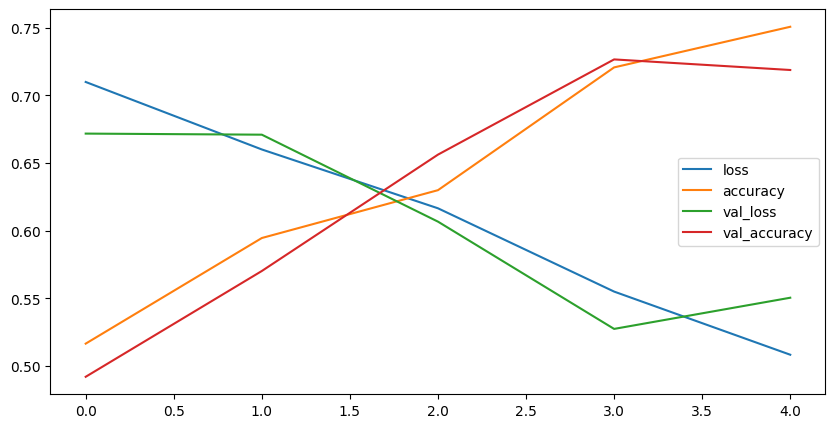

In [26]:
pd.DataFrame(history_3.history).plot(figsize=(10, 5));

It seems that Flatten layer with Droupout layers lead to a better performance. So I will try to use them and also use data augmentation. For this I will create augmented data batches to train the model on them.

In [27]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_path,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


Now I will build a model with the same structure as model 3 which would be trained on the augmented data

In [31]:
model_binary_4 = tf.keras.models.Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape=TARGET_SIZEE + (3, )),
    Conv2D(10, 3, activation = 'relu'),
    Dropout(0.1),
    MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Dropout(0.1),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_binary_4.compile(loss='binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

history_4 = model_binary_4.fit(train_data,
                               epochs=5,
                               steps_per_epoch=len(train_data_augmented),
                               validation_data=valid_data,
                               validation_steps=len(valid_data)*0.25) # to speed up the process


Epoch 1/5
47/47 [==============================] - 11s 186ms/step - loss: 0.6655 - accuracy: 0.5833 - val_loss: 0.5882 - val_accuracy: 0.7031
Epoch 2/5
47/47 [==============================] - 8s 160ms/step - loss: 0.5604 - accuracy: 0.7173 - val_loss: 0.5523 - val_accuracy: 0.7266
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5202 - accuracy: 0.7507 - val_loss: 0.5128 - val_accuracy: 0.7578
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.5035 - accuracy: 0.7513 - val_loss: 0.4981 - val_accuracy: 0.7188
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4630 - accuracy: 0.7887 - val_loss: 0.4923 - val_accuracy: 0.7812


In [32]:
model_binary_4.evaluate(valid_data)

16/16 [==============================] - 3s 198ms/step - loss: 0.5021 - accuracy: 0.7760


[0.5021008849143982, 0.7760000228881836]

It doesn't look like that it led to a significantly better or worse perfomance, but hte last model has the least tendency to overfitting

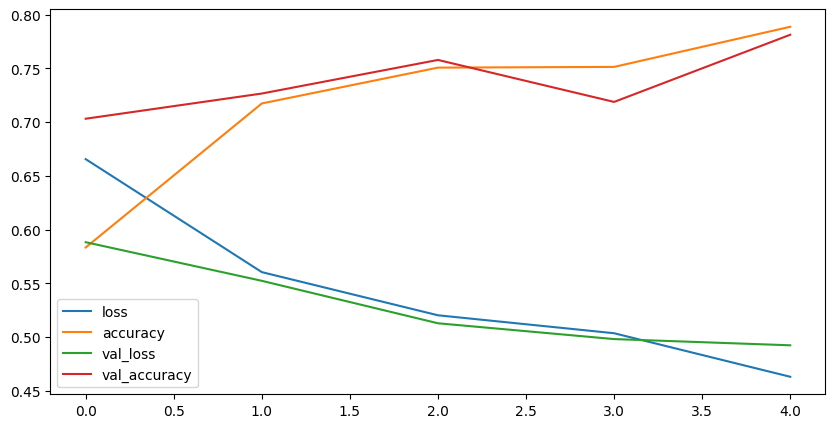

In [33]:
pd.DataFrame(history_4.history).plot(figsize=(10, 5));

In [34]:
model_binary_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 dropout_2 (Dropout)         (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

# Making a prediction on custon data

For this purpose I will use a random image I found in google.

--2023-09-26 15:21:31--  https://assets.biggreenegg.eu/app/uploads/2019/03/28145521/topimage-classic-hamburger-2019m04-800x534.jpg
Resolving assets.biggreenegg.eu (assets.biggreenegg.eu)... 13.35.116.66, 13.35.116.23, 13.35.116.72, ...
Connecting to assets.biggreenegg.eu (assets.biggreenegg.eu)|13.35.116.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379428 (371K) [image/jpeg]
Saving to: ‘topimage-classic-hamburger-2019m04-800x534.jpg.2’

topimage-classic-ha 100%[===================>] 370.54K  --.-KB/s    in 0.09s   

2023-09-26 15:21:31 (4.23 MB/s) - ‘topimage-classic-hamburger-2019m04-800x534.jpg.2’ saved [379428/379428]



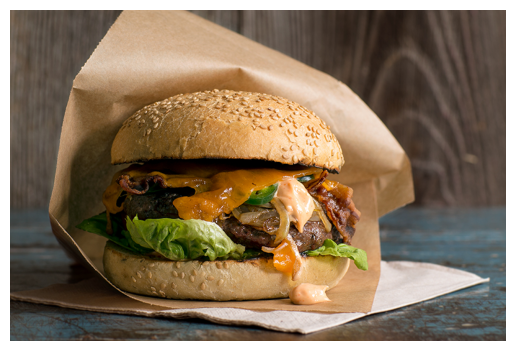

In [35]:
!wget https://assets.biggreenegg.eu/app/uploads/2019/03/28145521/topimage-classic-hamburger-2019m04-800x534.jpg
hamburger = mpimg.imread("topimage-classic-hamburger-2019m04-800x534.jpg")
plt.imshow(hamburger)
plt.axis(False);

In [36]:
hamburger.shape

(534, 800, 3)

Since the model takes images of shape (224, 224, 3), I have to reshape custom image. I will create a function that imports an image and reshapes it.

In [37]:
def load_prep_image(image, shape=224):

  img = tf.io.read_file(image)
  img = tf.image.decode_image(img, channels=3) # in case custom image would have 4 color channels
  img = tf.image.resize(img, size = [shape, shape])
  img = img/255.

  return img

In [38]:
hamburger = load_prep_image("topimage-classic-hamburger-2019m04-800x534.jpg")
hamburger

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.43865544, 0.38431373, 0.3199755 ],
        [0.47114846, 0.4184874 , 0.35612994],
        [0.40586233, 0.3588035 , 0.29605842],
        ...,
        [0.37409958, 0.31919762, 0.27606037],
        [0.37198892, 0.31708696, 0.26610658],
        [0.377591  , 0.32268903, 0.27955177]],

       [[0.44464037, 0.38181022, 0.31889504],
        [0.47507003, 0.411247  , 0.35289866],
        [0.40258104, 0.35690525, 0.2910539 ],
        ...,
        [0.3746623 , 0.31976035, 0.2766231 ],
        [0.37258416, 0.31708696, 0.26610658],
        [0.37298915, 0.3180872 , 0.27494994]],

       [[0.45270607, 0.38906562, 0.31593388],
        [0.4717087 , 0.40840337, 0.3469588 ],
        [0.40801072, 0.3539391 , 0.29222438],
        ...,
        [0.3755051 , 0.31519347, 0.27385944],
        [0.3800896 , 0.31734452, 0.26636413],
        [0.36017907, 0.3052771 , 0.26213986]],

       ...,

       [[0.27829638, 0.34446806, 0.34755942],
        [0.28

In [39]:
model_binary_4.predict(tf.expand_dims(hamburger, axis=0))

1/1 [==============================] - 0s 251ms/step


array([[0.13157955]], dtype=float32)

It is hard to understand the prediction, so I will create a function that makes a prediction and visualizes it. For this, I will first extract the class names.

In [40]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Projects/food101/hamburger_and_pizza/train/") # turning the training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['hamburger' 'pizza']


In [41]:
def pred_plot(model, filename, class_names):

  img = load_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])] # for binary only

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


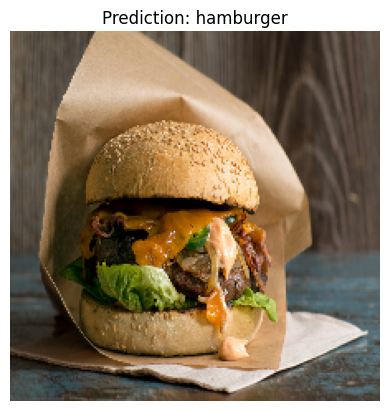

In [42]:
pred_plot(model_binary_4, "topimage-classic-hamburger-2019m04-800x534.jpg", class_names)

# Saving the model

In [43]:
model_binary_4.save("saved_binary_model")

I will also load this model and evaluate it to compare to the unsaved model results to be sure that is was saved correctly

In [44]:
loaded_model_4 = tf.keras.models.load_model('saved_binary_model')
loaded_model_4.evaluate(valid_data)

16/16 [==============================] - 2s 141ms/step - loss: 0.5021 - accuracy: 0.7760


[0.5021008849143982, 0.7760000228881836]

In [45]:
model_binary_4.evaluate(valid_data)

16/16 [==============================] - 2s 142ms/step - loss: 0.5021 - accuracy: 0.7760


[0.5021008849143982, 0.7760000228881836]